# Bias in Data Science Workbook

## Section 0: Define Visualization Functions

In [ ]:
def getPercentFemaleHired(x,y):

  totals = np.zeros(10)

  for index, row in x.iterrows():
    # If female
    if row['Sex'] == 1:
      if y[index] == 1: # If employed
        totals[0] +=1 # Number of females employed
        totals[3] += row['Undergraduate GPA'] # GPA of employed females
      else:
        totals[1] += 1 # Number of unemployed females
        totals[4] += row['Undergraduate GPA'] # gpa of unemployed females
      totals[2] +=1 # total females

    else:
      if y[index]== 1: # If employed
        totals[5] +=1 # employed males
        totals[8] += row['Undergraduate GPA'] # employed male GPA
      else:
        totals[6] += 1 # unemployed males
        totals[9] += row['Undergraduate GPA'] # gpa of unemployed males
      totals[7] +=1   # total males

  return totals

In [ ]:
def visualizeResults(x, predictedY):

  predictionResults = getPercentFemaleHired(x, predictedY)

  labels = 'Females Hired', 'Males Hired'
  percentageFemales = predictionResults[0]/(predictionResults[0] + predictionResults[5])
  percentageMales = predictionResults[5]/(predictionResults[0] + predictionResults[5])
  sizes = [percentageFemales, percentageMales]

  fig, ax = plt.subplots();
  ax.pie(sizes, labels=labels, autopct='%1.1f%%');

In [ ]:
def visualizeData(trainingData, validationData):

  fig, ax = plt.subplots(1,4, figsize=(18, 5));
  ax[0].pie([trainingData[0]/(trainingData[0]+trainingData[5]),
          trainingData[5]/(trainingData[0]+trainingData[5])],
        labels=['Females Employed', 'Males Employed'], autopct='%1.1f%%');
  ax[0].set_title('Percent of Females Employed');

  ax[1].pie([validationData[2], validationData[7]],
        labels=['Females', 'Males'], autopct='%1.1f%%');
  ax[1].set_title('Validation Dataset');

  ax[2].bar(['Female', 'Male'],
            [trainingData[3]/trainingData[0], trainingData[8]/trainingData[5]],
            color ='maroon', width = 0.4)
  ax[2].set_title('Employed GPA Comparison');

  ax[3].bar(['Female', 'Male'],
            [trainingData[4]/trainingData[1], trainingData[9]/trainingData[6]],
            color ='maroon', width = 0.4)
  ax[3].set_title('Unemployed GPA Comparison');

## Section 1: Setup and inital data visualization

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

# Import csv files as pandas data frame
resumeData = pandas.read_csv('./sample_data/TrainingData.csv').drop(columns=['Person Number'])
validationData = pandas.read_csv('./sample_data/ValidationData.csv').drop(columns=['Person Number'])

# Show first few rows
resumeData.head(5)

,Sex,Race,Age,Undergraduate School Name,Undergraduate GPA,Undergraduate Major,Graduate School Name,Graduate GPA,Graduate Major,Activity1,...,Activity4,Activity5,Activity6,Activity7,Skill1,Skill2,Skill3,Skill4,Skill5,Is Employed
0,1,2,22,4,3.6,2,4,3.6,2,6,...,18,26,14,15,14,10,7,9,1,1
1,1,5,38,21,3.5,5,21,3.5,5,1,...,17,24,15,0,11,14,10,15,0,1
2,1,5,24,10,3.2,6,10,3.2,6,5,...,20,14,15,0,8,2,15,5,0,1
3,1,3,30,18,3.3,6,18,3.3,6,3,...,15,21,17,0,10,6,7,9,0,1
4,1,3,23,10,3.7,2,10,3.7,2,6,...,20,25,21,19,7,16,17,10,12,1


Create X,Y data for training and validation that we will use later on

In [ ]:
y_train = resumeData.loc[:, 'Is Employed']
x_train = resumeData.drop(columns=['Is Employed'])

y_valid = validationData.loc[:, 'Is Employed']
x_valid = validationData.drop(columns=['Is Employed'])

Let's visualize the breakdown of the training and validation datasets.

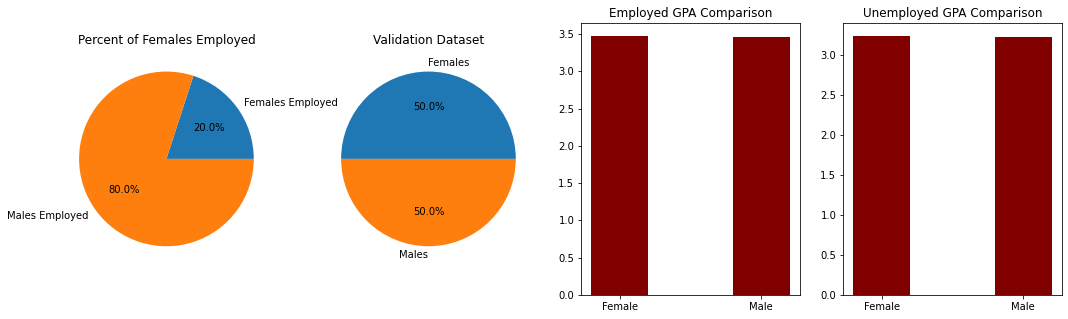

In [ ]:
trainingDataBreakdown = getPercentFemaleHired(x_train, y_train)
validationDataBreakdown = getPercentFemaleHired(x_valid, y_valid)

visualizeData(trainingDataBreakdown, validationDataBreakdown)

## Section 2: Apply Classification Models

Now that we have our formatted data, both training and validation datasets, we can do a grid search to find the best classifier and its parameters for this specific data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Least Squares
lr = LogisticRegression()
param1 = {}
param1['estimator__C'] = [10**-2, 10**-1, 10**0]
param1['estimator'] = [lr]

# Support Vector Machine
param2 = {}

param2['estimator__C'] = [5.0, 10, 20]
param2['estimator'] = [SVC()]

# K-nearest neighbors
param3 = {}
param3['estimator__n_neighbors'] = [3, 5, 7]
param3['estimator'] = [KNeighborsClassifier()]

# Elastic Net
param4 = {}
param4['estimator__n_estimators'] = [10, 100, 500]
param4['estimator'] = [RandomForestClassifier()]

pipe = Pipeline([('scaler', StandardScaler()),('estimator', lr)])

params = [param1, param2, param3, param4]

gs = GridSearchCV(pipe, params);
gs.fit(x_train, y_train);

In [ ]:
print(gs.best_params_)
results = pandas.DataFrame(gs.cv_results_)
results.head(12)

{'estimator': RandomForestClassifier(n_estimators=500), 'estimator__n_estimators': 500}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__C,param_estimator__n_neighbors,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.081175,0.017204,0.010077,0.002026,LogisticRegression(),0.01,NaN,NaN,"{'estimator': LogisticRegression(), 'estimator...",0.6,0.836,0.796,0.696,0.708,0.7272,0.082575,3
1,0.099119,0.056857,0.009542,0.001748,LogisticRegression(),0.1,NaN,NaN,"{'estimator': LogisticRegression(), 'estimator...",0.6,0.828,0.791,0.698,0.706,0.7246,0.079598,4
2,0.087445,0.010268,0.008153,0.002446,LogisticRegression(),1,NaN,NaN,"{'estimator': LogisticRegression(), 'estimator...",0.6,0.824,0.792,0.697,0.705,0.7236,0.078853,5
3,1.564786,0.902651,0.222260,0.058646,SVC(),5.0,NaN,NaN,"{'estimator': SVC(), 'estimator__C': 5.0}",0.6,0.801,0.797,0.695,0.702,0.7190,0.074611,6
4,0.905129,0.110708,0.176163,0.044319,SVC(),10,NaN,NaN,"{'estimator': SVC(), 'estimator__C': 10}",0.6,0.771,0.754,0.690,0.704,0.7038,0.060001,9
5,2.159252,0.499899,0.246598,0.042484,SVC(),20,NaN,NaN,"{'estimator': SVC(), 'estimator__C': 20}",0.6,0.741,0.727,0.688,0.690,0.6892,0.049134,12
6,0.033764,0.029395,0.455864,0.145523,KNeighborsClassifier(),NaN,3,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.6,0.731,0.729,0.683,0.709,0.6904,0.048397,11
7,0.028545,0.008681,0.472094,0.059562,KNeighborsClassifier(),NaN,5,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.6,0.746,0.760,0.694,0.700,0.7000,0.056128,10
8,0.018937,0.012966,0.241577,0.043306,KNeighborsClassifier(),NaN,7,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.6,0.766,0.767,0.694,0.697,0.7048,0.061278,8
9,0.115387,0.016251,0.010899,0.003085,RandomForestClassifier(n_estimators=500),NaN,NaN,10,{'estimator': RandomForestClassifier(n_estimat...,0.6,0.777,0.760,0.692,0.699,0.7056,0.062349,7


We now have a model that is trained on the training dataset, we can verify it's performance on the validation data and visualize the results

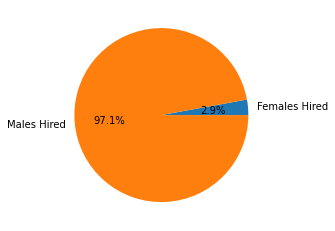

In [ ]:
y_pred = gs.predict(x_valid)

visualizeResults(x_valid, y_pred)

# Section 3: Feature Selection to reduce Bias

There is clearly a bias towards men, we can look at some feature selection techniques to see what features are most contributing to our models predictions.

This function takes in a trained pipeline and a list of columns that have been dropped from the data and creates a feature variance threshold bar chart showing the importance of each feature in the classification.

In [ ]:
def viewFeatures(trainedPipeline, x, droppedColumns=[]):
  sort = trainedPipeline['classifier'].feature_importances_.argsort()
  featureNames = x.drop(columns=droppedColumns).columns
  plt.figure()
  plt.barh(featureNames[sort], trainedPipeline['classifier'].feature_importances_[sort])
  plt.xlabel("Feature Importance");

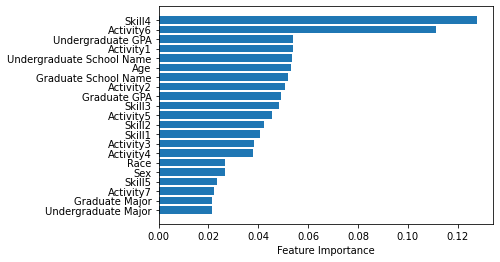

In [ ]:
# Feature Selection
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit(x_train)

varianceData = pandas.DataFrame(np.vstack([x_train.columns, selector.variances_]))
varianceData.head()

# visualize feature importance
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(n_estimators=500))]);
pipe.fit(x_train, y_train);

viewFeatures(pipe, x_train)

We can see that sex is contributing to the classification, however it is not among the greatest contributors. What happens if we remove this as a feature in the data?

This function takes in the x training and validation data as well as an array of column names to be removed. It then trains a new model and plots the percentage of females versus males hired based on the validation data.

In [ ]:
def removeFeatures(x_input, x_validation_input, y_input, features):
# features = ['Sex']

  x_removed = x_input.drop(columns = features)
  x_valid_removed = x_validation_input.drop(columns = features)

  pipe_removed = Pipeline([('scaler', StandardScaler()),
                            ('classifier', RandomForestClassifier(n_estimators=500))]);


  pipe_removed.fit(x_removed, y_input);

  y_pred_removed = pipe_removed.predict(x_valid_removed)

  visualizeResults(x_valid, y_pred_removed)
  return pipe_removed

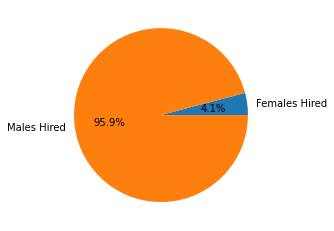

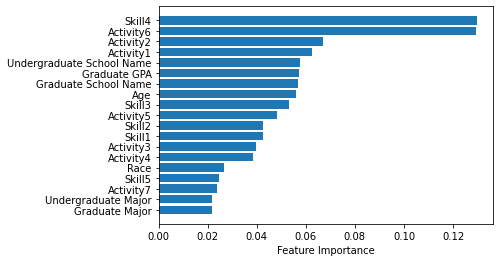

In [ ]:
# Remove sex from training data and refit model
columnsToDrop = ['Sex', 'Undergraduate GPA']
trainedPipeline = removeFeatures(x_train, x_valid, y_train, columnsToDrop)

viewFeatures(trainedPipeline, x_train, columnsToDrop)

While this did slightly improve the model, it seems that simply removing the sex feature is not enough to remove the bias. It must be biasing towards men with other features in mind. You can modify the columnsToDrop variable and include different columns to see how that affects the model's classification of men and women.

# Section 4: Sampling Techniques to reduce Bias

Removing sex as a feature had a limited effect, we can try some sampling techniques to artifically balance the amount of women in the training data.

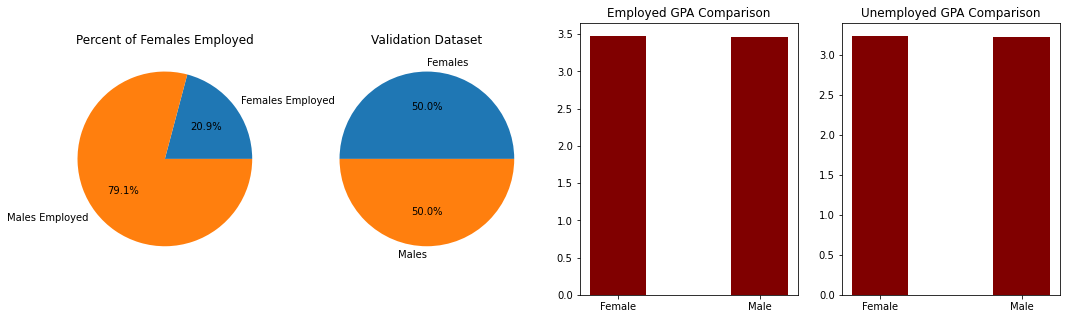

In [ ]:
from imblearn.over_sampling import SMOTE

# create balanced data using the SMOTE algorithm
sm = SMOTE(random_state=42)
balancedX, balancedY = sm.fit_resample(x_train, y_train)

trainingDataBreakdown = getPercentFemaleHired(balancedX, balancedY)
validationDataBreakdown = getPercentFemaleHired(x_valid, y_valid)

visualizeData(trainingDataBreakdown, validationDataBreakdown)

# Use the best performing classifier from above
pipe_balanced = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(n_estimators=500))]);
pipe_balanced.fit(balancedX, balancedY);

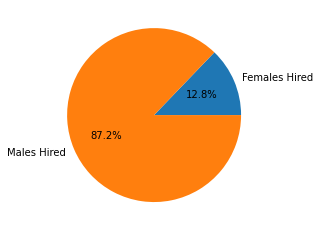

In [ ]:
y_pred_balanced = pipe_balanced.predict(x_valid)

visualizeResults(x_valid, y_pred_balanced)

This again, had a slight improvement but not enough to overcome the significant amount of bias in the model.

In [ ]:
# Try Undersampling here!
